**Muhammad Ahib Ibrilli**   
**21120122140149**   
**Metnum Kelas D**      

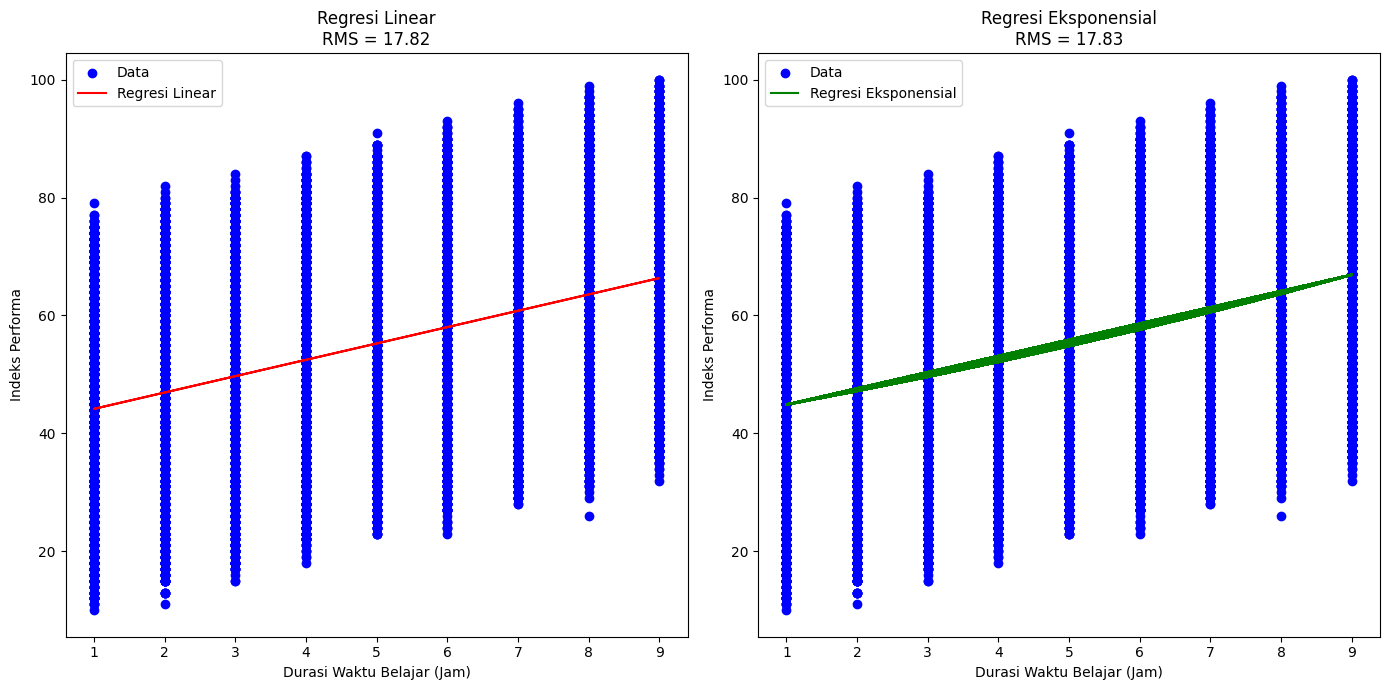

Hasil Regresi Linear:
Intercept (b0): 41.37917462286025
Koefisien (b1): 2.773062824638938
RMS: 17.819474832547773

Hasil Regresi Eksponensial:
Parameter a: 42.688657428807495
Parameter b: 0.04991554508170662
RMS: 17.82862874184698


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Baca data dari file CSV
data = pd.read_csv('Student_Performance.csv')

# Ambil kolom 'Hours Studied' sebagai X dan 'Performance Index' sebagai Y
X = data['Hours Studied'].values.reshape(-1, 1)
Y = data['Performance Index'].values

# Model regresi linear
linear_model = LinearRegression()
linear_model.fit(X, Y)
Y_pred_linear = linear_model.predict(X)
rms_linear = np.sqrt(mean_squared_error(Y, Y_pred_linear))

# Definisikan fungsi eksponensial
def exponential_model(X, a, b):
    return a * np.exp(b * X)

# Gunakan curve_fit untuk menyesuaikan data dengan model eksponensial
params, _ = curve_fit(exponential_model, X.flatten(), Y, maxfev=10000)
Y_pred_exponential = exponential_model(X.flatten(), *params)
rms_exponential = np.sqrt(mean_squared_error(Y, Y_pred_exponential))

# Plot hasil regresi
plt.figure(figsize=(14, 7))

# Plot regresi linear
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred_linear, color='red', label='Regresi Linear')
plt.title('Regresi Linear\nRMS = {:.2f}'.format(rms_linear))
plt.xlabel('Durasi Waktu Belajar (Jam)')
plt.ylabel('Indeks Performa')
plt.legend()

# Plot regresi eksponensial
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred_exponential, color='green', label='Regresi Eksponensial')
plt.title('Regresi Eksponensial\nRMS = {:.2f}'.format(rms_exponential))
plt.xlabel('Durasi Waktu Belajar (Jam)')
plt.ylabel('Indeks Performa')
plt.legend()

plt.tight_layout()
plt.show()

# Print hasil regresi
print("Hasil Regresi Linear:")
print("Intercept (b0):", linear_model.intercept_)
print("Koefisien (b1):", linear_model.coef_[0])
print("RMS:", rms_linear)

print("\nHasil Regresi Eksponensial:")
print("Parameter a:", params[0])
print("Parameter b:", params[1])
print("RMS:", rms_exponential)
